<a href="https://colab.research.google.com/github/Dragnel6/Programacion-3/blob/main/Entrenamiento%20de%20una%20IA%20para%20clasificaci%C3%B3n%20de%20im%C3%A1genes%20para%20una%20tienda%20de%20ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenamiento de una IA para clasificación de imágenes para
# una tienda de ropa.

In [15]:
#1. Importar las librerias.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import tensorflow_datasets as tfds

In [ ]:
#cargamos nuestro dataset en variables
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"], dataset["test"]
print(datos_entrenamiento)

In [57]:
numeros_letras = ["Camiseta", "Pantalón", "Sueter", "Vestido", "Abrigo", "Sandalia", "Camisa", "Tennis", "Bolso", "Botas"]

In [58]:
#pasar en variables los datos de entrenamiento y prueba
numeros_ejemplo_entrenamiento = metadata.splits["train"].num_examples
numeros_ejemplo_prueba = metadata.splits["test"].num_examples

In [59]:
#funcion normalizadora de los pixeles de 0 - 255 que sean de 0 - 1
def normalizacion(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 # 150/255=0.588
  return images, labels

In [60]:
#llamamoas la funcion normalizadora en ambos dataset
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [61]:
#estruturamos nuestra red neuronal
modelo = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)), #capa de entreda de 28*28 = 784 neuronas una para cada pixel
        tf.keras.layers.Dense(64, activation=tf.nn.relu), #capa oculta con 64 neuronas, funcion de activacion relu
        tf.keras.layers.Dense(64, activation=tf.nn.relu), #capa oculta con 64 neuronas, funcion de activacion relu
        tf.keras.layers.Dense(10, activation=tf.nn.softmax) #capa de salida con 10 neuronas una para cada numero, 
        #funcion de activacion softmax. esta funcion es requerida para clasificacion
])

In [62]:
#Compilamos el modelo de red neuronal e indicamos las funciones a utilizar 
modelo.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [63]:
#Entrenamiento por lotes
batchsize = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numeros_ejemplo_entrenamiento).batch(batchsize)
datos_prueba = datos_prueba.repeat().shuffle(numeros_ejemplo_prueba).batch(batchsize)

In [64]:
#entrenado nuetro modelo de datos
modelo.fit(datos_entrenamiento, epochs=5, 
           steps_per_epoch=math.ceil(numeros_ejemplo_entrenamiento/batchsize))

Epoch 1/5
1875/1875 [==============================] - 14s 4ms/step - loss: 0.5051 - accuracy: 0.8231
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3717 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3390 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3162 - accuracy: 0.8839
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2983 - accuracy: 0.8896


In [65]:
#evaluar el modelo con los datos de prueba
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(numeros_ejemplo_prueba/batchsize))
print("Resultado de las pruebas", test_loss, test_accuracy)

313/313 [==============================] - 2s 3ms/step - loss: 0.3703 - accuracy: 0.8648
Resultado de las pruebas 0.37026146054267883 0.8648163080215454


In [67]:
#graficar la salida para evaluar los resultados
def graficar_imagen(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  #plt.xticks([])
  #plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label==true_labels:
    color = "green"
  else:
    color = "red"
  plt.xlabel("Prediccion: {}".format(numeros_letras[predicted_label]), color=color)

9 9


Text(0.5, 0, 'Prediccion: Botas')

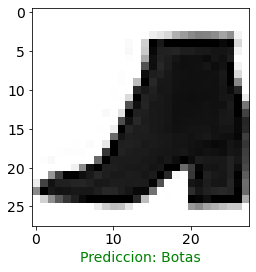

In [71]:
#convertimos los tensores o imagenes en matrices numpy
for imagen_prueba, etiqueta_prueba in datos_prueba.take(1):
  imagen_prueba = imagen_prueba.numpy()
  etiqueta_prueba = etiqueta_prueba.numpy()
  predicciones = modelo.predict(imagen_prueba)

i = 0
for miImagen, etiqueta in datos_entrenamiento.take(1):
  etiqueta = etiqueta.numpy()
  imagen = miImagen[i].numpy().reshape(1,28,28,1)
  prediccion = modelo.predict(imagen, batch_size=1)

valor_predicho = np.argmax(prediccion)  
print( valor_predicho, etiqueta[i] ) 

index = 0
img = imagen #imagen_prueba[index]
plt.grid(False)
plt.imshow(img[0,...,0], cmap=plt.cm.binary)
#label = etiqueta_prueba[index]
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_predicho]), color="green")

In [84]:
#Graficamos los valores de las matriz una para las imagenes y otra para las graficas de barra segun el acierto
def graficar_valores_matriz(i, matriz_prediccion, etiqueta_verdadera):
  matriz_prediccion, etiqueta_verdadera = matriz_prediccion[i], etiqueta_verdadera[i]
  plt.grid(False)
  #plt.xticks([])
  #plt.yticks([])
  thisplot = plt.bar(range(10), matriz_prediccion, color="#888888")
  plt.ylim([0,1])
  etiqueta_prediccion = np.argmax(matriz_prediccion)

  thisplot[etiqueta_prediccion].set_color("red")
  thisplot[etiqueta_verdadera].set_color("green")

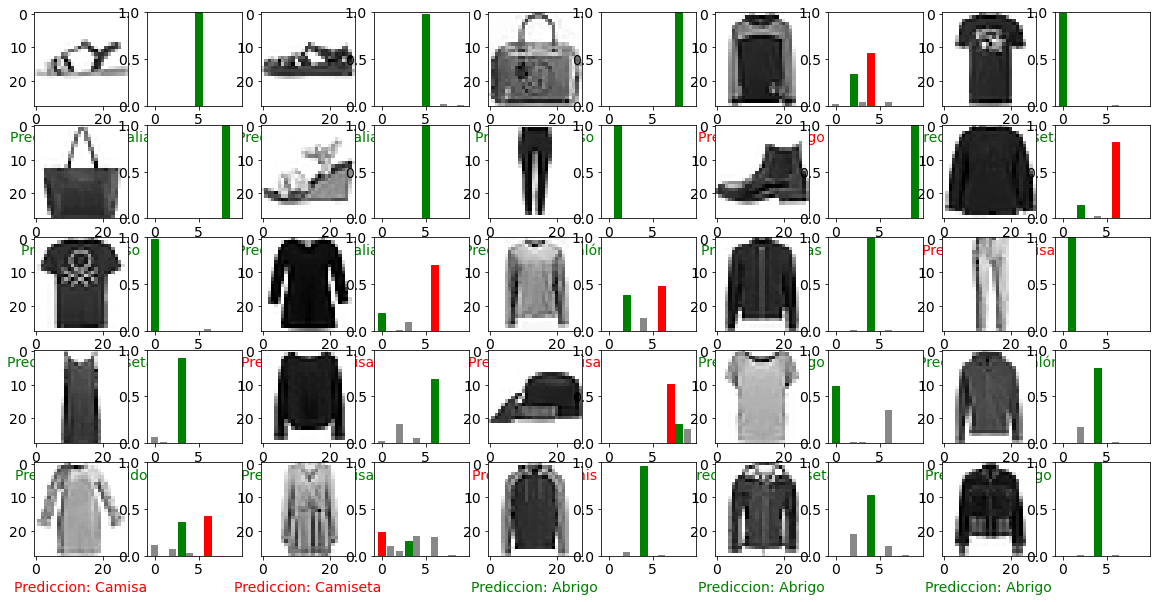

In [85]:
#recorrer las imagenes a graficar
numfilas = 5
numcols = 5
numimgs = numfilas*numcols

plt.figure(figsize=(2*2*numcols, 2*numfilas))
for i in range(numimgs):
  plt.subplot(numfilas, 2*numcols, 2*i+1)
  graficar_imagen(i, predicciones, etiqueta_prueba, imagen_prueba)

  plt.subplot(numfilas, 2*numcols, 2*i+2)
  graficar_valores_matriz(i, predicciones, etiqueta_prueba)
  

plt.show()

In [75]:
imagen = cv2.imread("/content/bolso_b_n.jpg", 0)
imagen =  tf.cast(imagen, tf.float32)
imagen = imagen / 255
imagen = np.expand_dims(imagen, axis=0)
print(imagen.shape)

(1, 28, 28)


In [76]:
#Entrenar
prdlocal = modelo.predict(imagen, batch_size=1)
tagLocalTest = np.argmax(prdlocal)

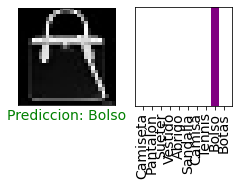

In [77]:
#Imprimir
columns = 2
rows = 2
plt.figure(figsize=(2*2*columns, 2*rows))
plt.subplot(rows, 2*columns, 2*0+1)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(imagen[0,...], cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(numeros_letras[tagLocalTest]), color='green')

plt.subplot(rows, 2*columns, 2*0+2)
plt.grid(False)
plt.xticks([])
plt.yticks([])
thisplot = plt.bar(range(10), prdlocal[0], color = "#888888")
plt.ylim([0,1])
thisplot[tagLocalTest].set_color("red")
thisplot[tagLocalTest].set_color("purple")
plt.xticks(range(10), numeros_letras, rotation=90)

plt.rcParams['font.size'] = 14
plt.show()